# 샘플
https://github.com/FinanceData/FinanceDataReader#quick-start<br>
https://financedata.github.io/posts/finance-data-reader-users-guide.html

In [2]:
#  차트 설정
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = 'monospace'
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True

In [4]:
import FinanceDataReader as fdr

# 한국거래소 상장종목 전체
df_krx = fdr.StockListing('KRX')
df_krx.head()


,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,72000,2,-800,-1.10,72400,72500,71700,9871284,710939612000,429824343600000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,428500,2,-26000,-5.72,444000,448000,428500,498100,215049437500,100269000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,132600,2,-1300,-0.97,132200,133000,130800,3641222,480440675249,96533113599000,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,711000,2,-14000,-1.93,725000,727000,711000,48585,34875411708,50604714000000,71174000,STK
4,005935,KR7005931001,삼성전자우,KOSPI,,57900,3,0,0.00,58000,58000,57600,989923,57228720713,47645139930000,822886700,STK


<Axes: xlabel='Date'>

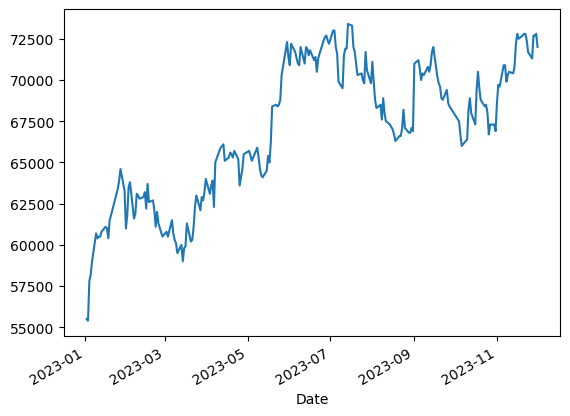

In [3]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
# 삼성전자, 2023년
df = fdr.DataReader('005930', '2023')
df.head(10)
df['Close'].plot()

In [5]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

df = fdr.DataReader('005930', '2023-01-01', '2023-11-30')
# df = fdr.DataReader('005930', '2023-01-01') # 현재까지
fdr.chart.plot(df)

None


In [13]:
# 이동평균선
import FinanceDataReader as fdr
stock_df = fdr.DataReader('005930', '2023').reset_index()

ma = [5,20,60,120]
for days in ma:
    stock_df['ma_'+str(days)] = stock_df['Close'].rolling(window = days).mean()

stock_df


,Date,Open,High,Low,Close,Volume,Change,ma_5,ma_20,ma_60,ma_120
0,2023-01-02,55500,56100,55200,55500,10031448,0.003617,NaN,NaN,NaN,NaN
1,2023-01-03,55400,56000,54500,55400,13547030,-0.001802,NaN,NaN,NaN,NaN
2,2023-01-04,55700,58000,55600,57800,20188071,0.043321,NaN,NaN,NaN,NaN
3,2023-01-05,58200,58800,57600,58200,15682826,0.006920,NaN,NaN,NaN,NaN
4,2023-01-06,58300,59400,57900,59000,17334989,0.013746,57180.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
222,2023-11-27,71500,72100,71100,71300,9113857,-0.005579,72200.0,70985.0,69618.333333,69983.333333
223,2023-11-28,71400,72700,71300,72700,13283081,0.019635,72180.0,71275.0,69716.666667,69987.500000
224,2023-11-29,72400,72800,72200,72700,9283933,0.000000,72160.0,71480.0,69810.000000,69995.833333
225,2023-11-30,72700,72800,72200,72800,15783714,0.001376,72240.0,71635.0,69908.333333,70010.833333


In [1]:
# import talib as ta
import ta
import FinanceDataReader as fdr
stock_df = fdr.DataReader('005930', '2023').reset_index()

ma = [5,20,60,120]
for days in ma:
    stock_df['ma_'+str(days)] = stock_df['Close'].rolling(window = days).mean()

H, L, C, V = stock_df['High'], stock_df['Low'], stock_df['Close'], stock_df['Volume']

# stock_df['bol_high'] = ta.volatility.bollinger_hband(C)
# stock_df['bol_low']  = ta.volatility.bollinger_lband(C)
stock_df['MFI'] = ta.volume.money_flow_index(
    high=H, low=L, close=C, volume=V, fillna=True)

stock_df['ADI'] = ta.volume.acc_dist_index(
    high=H, low=L, close=C, volume=V, fillna=True)

stock_df['OBV'] = ta.volume.on_balance_volume(close=C, volume=V, fillna=True)
stock_df['CMF'] = ta.volume.chaikin_money_flow(
    high=H, low=L, close=C, volume=V, fillna=True)

stock_df['FI'] = ta.volume.force_index(close=C, volume=V, fillna=True)
stock_df['EOM, EMV'] = ta.volume.ease_of_movement(
    high=H, low=L, volume=V, fillna=True)

stock_df['VPT'] = ta.volume.volume_price_trend(close=C, volume=V, fillna=True)
stock_df['NVI'] = ta.volume.negative_volume_index(close=C, volume=V, fillna=True)
stock_df['VMAP'] = ta.volume.volume_weighted_average_price(
    high=H, low=L, close=C, volume=V, fillna=True)

# Volatility
stock_df['ATR'] = ta.volatility.average_true_range(
    high=H, low=L, close=C, fillna=True)
stock_df['BHB'] = ta.volatility.bollinger_hband(close=C, fillna=True)
stock_df['BLB'] = ta.volatility.bollinger_lband(close=C, fillna=True)
stock_df['KCH'] = ta.volatility.keltner_channel_hband(
    high=H, low=L, close=C, fillna=True)
stock_df['KCL'] = ta.volatility.keltner_channel_lband(
    high=H, low=L, close=C, fillna=True)
stock_df['KCM'] = ta.volatility.keltner_channel_mband(
    high=H, low=L, close=C, fillna=True)
stock_df['DCH'] = ta.volatility.donchian_channel_hband(
    high=H, low=L, close=C, fillna=True)
stock_df['DCL'] = ta.volatility.donchian_channel_lband(
    high=H, low=L, close=C, fillna=True)
stock_df['DCM'] = ta.volatility.donchian_channel_mband(
    high=H, low=L, close=C, fillna=True)
stock_df['UI'] = ta.volatility.ulcer_index(close=C, fillna=True)
# Trend
stock_df['SMA'] = ta.trend.sma_indicator(close=C, fillna=True)
stock_df['EMA'] = ta.trend.ema_indicator(close=C, fillna=True)
stock_df['WMA'] = ta.trend.wma_indicator(close=C, fillna=True)
stock_df['MACD'] = ta.trend.macd(close=C, fillna=True)
stock_df['ADX'] = ta.trend.adx(high=H, low=L, close=C, fillna=True)
stock_df['-VI'] = ta.trend.vortex_indicator_neg(
    high=H, low=L, close=C, fillna=True)
stock_df['+VI'] = ta.trend.vortex_indicator_pos(
    high=H, low=L, close=C, fillna=True)
stock_df['TRIX'] = ta.trend.trix(close=C, fillna=True)
stock_df['MI'] = ta.trend.mass_index(high=H, low=L, fillna=True)
stock_df['CCI'] = ta.trend.cci(high=H, low=L, close=C, fillna=True)
stock_df['DPO'] = ta.trend.dpo(close=C, fillna=True)
stock_df['KST'] = ta.trend.kst(close=C, fillna=True)
stock_df['Ichimoku'] = ta.trend.ichimoku_a(high=H, low=L, fillna=True)
stock_df['Parabolic SAR'] = ta.trend.psar_down(
    high=H, low=L, close=C, fillna=True)
stock_df['STC'] = ta.trend.stc(close=C, fillna=True)
# Momentum
stock_df['RSI'] = ta.momentum.rsi(close=C, fillna=True)
stock_df['SRSI'] = ta.momentum.stochrsi(close=C, fillna=True)
stock_df['TSI'] = ta.momentum.tsi(close=C, fillna=True)
stock_df['UO'] = ta.momentum.ultimate_oscillator(
    high=H, low=L, close=C, fillna=True)
stock_df['SR'] = ta.momentum.stoch(close=C, high=H, low=L, fillna=True)
stock_df['WR'] = ta.momentum.williams_r(high=H, low=L, close=C, fillna=True)
stock_df['AO'] = ta.momentum.awesome_oscillator(high=H, low=L, fillna=True)
stock_df['KAMA'] = ta.momentum.kama(close=C, fillna=True)
stock_df['ROC'] = ta.momentum.roc(close=C, fillna=True)
stock_df['PPO'] = ta.momentum.ppo(close=C, fillna=True)
stock_df['PVO'] = ta.momentum.pvo(volume=V, fillna=True)


stock_df

,Date,Open,High,Low,Close,Volume,Change,ma_5,ma_20,ma_60,...,SRSI,TSI,UO,SR,WR,AO,KAMA,ROC,PPO,PVO
0,2023-01-02,55500,56100,55200,55500,10031448,0.003617,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,33.333333,-66.666667,0.000000,55500.000000,0.000000,0.000000,0.000000
1,2023-01-03,55400,56000,54500,55400,13547030,-0.001802,NaN,NaN,NaN,...,0.000000,-100.000000,37.500000,56.250000,-43.750000,0.000000,55455.555556,0.000000,-0.014375,2.724923
2,2023-01-04,55700,58000,55600,57800,20188071,0.043321,NaN,NaN,NaN,...,0.000000,-57.894737,66.000000,94.285714,-5.714286,0.000000,55465.313909,0.000000,0.318551,9.312917
3,2023-01-05,58200,58800,57600,58200,15682826,0.006920,NaN,NaN,NaN,...,0.000000,-30.749186,62.903226,86.046512,-13.953488,0.000000,55476.696578,0.000000,0.630921,10.909044
4,2023-01-06,58300,59400,57900,59000,17334989,0.013746,57180.0,NaN,NaN,...,0.000000,-8.637100,64.935065,91.836735,-8.163265,0.000000,55491.361732,0.000000,0.979478,12.913975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,2023-11-27,71500,72100,71100,71300,9113857,-0.005579,72200.0,70985.0,69618.333333,...,0.000000,21.210413,40.401108,46.153846,-53.846154,2488.529412,62849.128069,1.422475,1.237000,-12.555516
223,2023-11-28,71400,72700,71300,72700,13283081,0.019635,72180.0,71275.0,69716.666667,...,0.575149,21.634991,51.510849,82.051282,-17.948718,2180.000000,62890.130658,3.120567,1.257428,-9.718912
224,2023-11-29,72400,72800,72200,72700,9283933,0.000000,72160.0,71480.0,69810.000000,...,0.575149,21.976008,52.309492,82.051282,-17.948718,2085.588235,62930.962580,3.267045,1.258716,-10.270528
225,2023-11-30,72700,72800,72200,72800,15783714,0.001376,72240.0,71635.0,69908.333333,...,0.614164,22.403934,56.956469,80.645161,-19.354839,1916.176471,62972.040780,2.824859,1.256148,-5.955691


In [2]:
stock_df.to_pickle('../data/sample.pkl')